## Supplementary Analyses


### Import modules

In [1]:
!python -m pip install wordcloud
!python -m pip install textacy


In [2]:
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import itertools as it
import matplotlib.pyplot as plt
import re, string, sys
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from subprocess import check_output
import warnings
import random
warnings.filterwarnings('ignore')
from textacy.text_stats import TextStats
import sys
sys.path
import nilearn

### Read tweets by humans (scraped) and Bloom, all files and selection

In [3]:
import os
os.getcwd()

'/Users/suelim/Documents/Research/Evaluation_Vaping_Messages/scripts/02_computational_analyses/01_NGrams-WordClouds'

In [4]:
#read retweeted tweets
humanmsgfile = '../../../data/00_Scraped_messages/vaping_tweets_cleaned_CTA.csv'
all_humanmsg_df  = pd.read_csv(humanmsgfile)
print(len(all_humanmsg_df))
all_humanmsg_df.head()

1384


,tweets
0,It's #novapenovember - come visit to get free ...
1,just launched the and Education Resource Cente...
2,Just finished up a successful event at the gam...
3,"""The tobacco industrys marketing isnt toward t..."
4,"""These products are ever-changing and easily h..."


In [5]:
#read 15 selected human generated messages
selected_humanmsgfile = '../../../data/00_Scraped_messages/Selected human-generated tweets.csv'
selected_humanmsg_df  = pd.read_csv(selected_humanmsgfile)
print(len(selected_humanmsg_df))
selected_humanmsg_df.head()

15


,tweets
0,Nicotine in vapes can disrupt neurotransmitter...
1,Vaping is risky. E-cigarettes are highly addic...
2,Its so freeing and fulfilling once you stop cr...
3,Vapes and e-cigarettes increase your risk of a...
4,"Nicotine is highly addictive, and comes in man..."


In [6]:
#read all generated messages w/o prompt
bloomgenmsgfile_np = '../../../data/01_AI_generated_messages/Total AI-generated messages_no prompt.csv'
all_bloomgenmsg_np_df  = pd.read_csv(bloomgenmsgfile_np)
print(len(all_bloomgenmsg_np_df))
all_bloomgenmsg_np_df.head()

500


,tweets
0,is usually a chemical compound that causes an ...
1,"can be an addictive substance, and there is a ..."
2,"is a highly addictive substance, and it can be..."
3,is an addictive drug and could trigger the ver...
4,is thought to be a more harmful chemical than ...


In [7]:
#read 15 generated messages w/o prompt
selected_bloomgenmsg_np     = '../../../data/01_AI_generated_messages/Selected AI-generated messages_no prompt.csv'
selected_bloomgenmsg_np_df  = pd.read_csv(selected_bloomgenmsg_np)
print(len(selected_bloomgenmsg_np_df))
selected_bloomgenmsg_np_df.head()

15


,tweets
0,"a very dangerous chemical, but it's still lega..."
1,"far more potent than in cigarettes, which is w..."
2,a highly addictive substance. Nicotine is the ...
3,"a mixture of nicotine, propylene glycol, glyce..."
4,chemicals that can harm the lungs. These chemi...


In [8]:
def clean_text(text):
   #Make text lowercase   
   text = text.lower()
   #remove text in square brackets
   text = re.sub(r'\[.*?\]', '', text)
   #remove punctuation   
   text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
   #remove words containing numbers
   text = re.sub(r'\w*\d\w*', '', text)
    
   return text

In [9]:
all_humanmsg_df            = pd.DataFrame(all_humanmsg_df.tweets[:].apply(lambda x: clean_text(x)))
selected_humanmsg_df       = pd.DataFrame(selected_humanmsg_df.tweets[:].apply(lambda x: clean_text(x)))

all_bloomgenmsg_np_df      = pd.DataFrame(all_bloomgenmsg_np_df.tweets[:].apply(lambda x: clean_text(x)))
selected_bloomgenmsg_np_df = pd.DataFrame(selected_bloomgenmsg_np_df.tweets[:].apply(lambda x: clean_text(x)))


In [10]:
print(len(all_humanmsg_df))
print(len(selected_humanmsg_df))

print(len(all_bloomgenmsg_np_df))
print(len(selected_bloomgenmsg_np_df))


1384
15
500
15


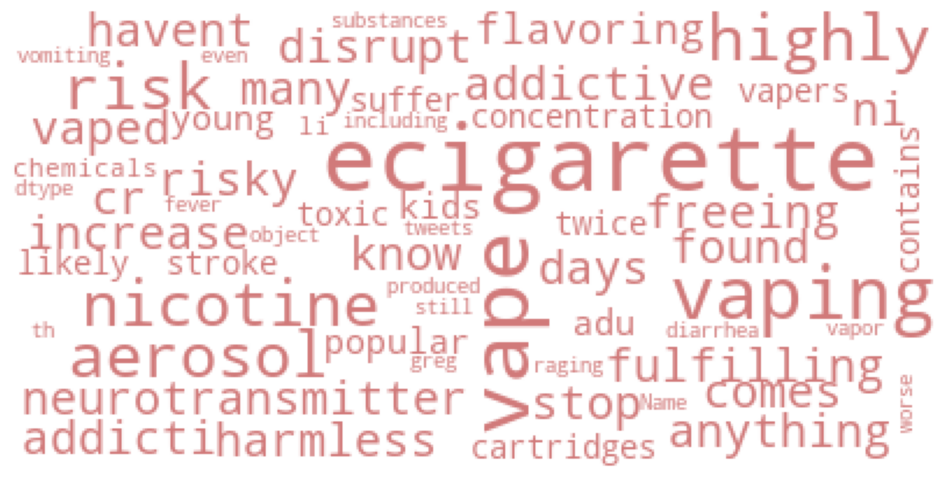

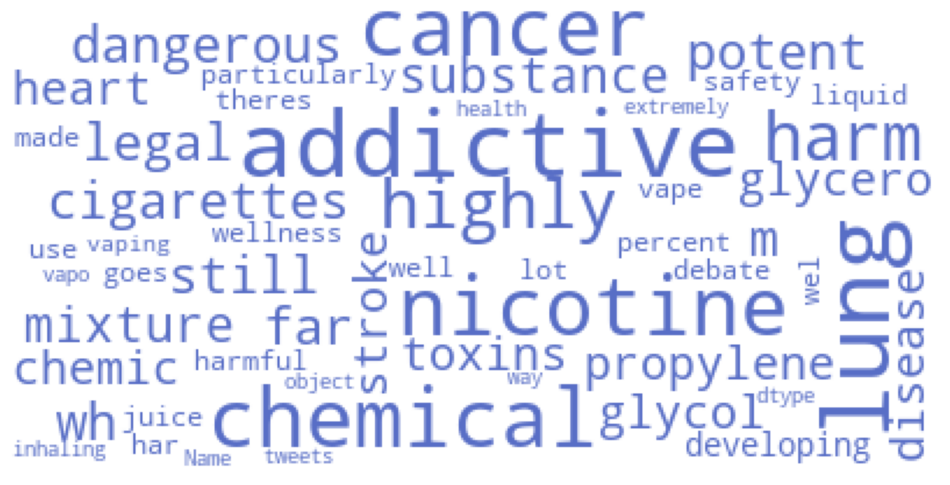

In [11]:
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = list(STOPWORDS)

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(228, 49%, 56%)" 

def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 49%, 65%)" 

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=300,
                          max_font_size=40, 
                          random_state=41
                         ).generate(str(selected_humanmsg_df.tweets))
print(wordcloud)
fig = plt.figure(1)
#plt.imshow(wordcloud)
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3))
plt.axis('off')
plt.show();

wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=300,
                          max_font_size=40, 
                          random_state=41
                         ).generate(str(selected_bloomgenmsg_np_df.tweets))

print(wordcloud2)
fig = plt.figure(1)
#plt.imshow(wordcloud2)
plt.imshow(wordcloud2.recolor(color_func=blue_color_func, random_state=3))

plt.axis('off')
plt.show();

In [12]:
all_bloomgenmsg_np_df

,tweets
0,is usually a chemical compound that causes an ...
1,can be an addictive substance and there is a r...
2,is a highly addictive substance and it can be ...
3,is an addictive drug and could trigger the ver...
4,is thought to be a more harmful chemical than ...
...,...
495,because of the risk of inhaling chemicals and ...
496,for the health of your child in fact it is jus...
497,because it is addictive but it isn‚äôt as dang...
498,it‚äôs not just a new health concern but an ec...


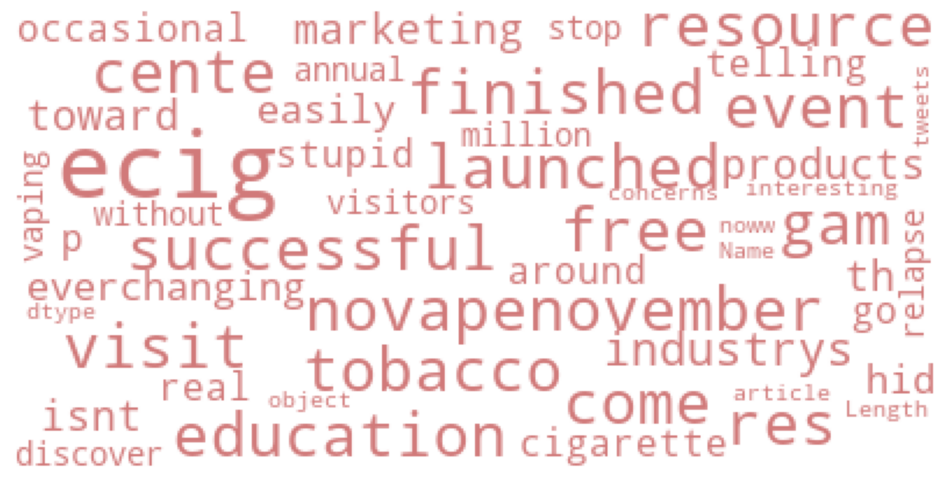

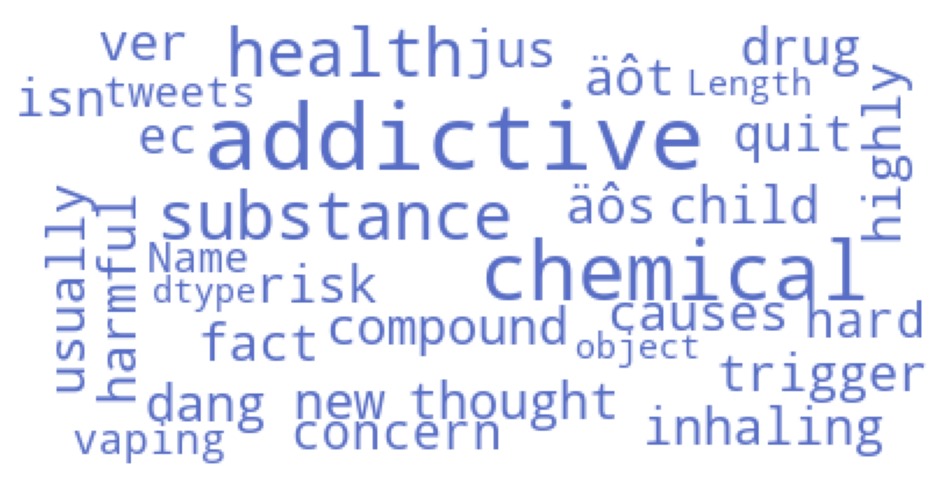

In [13]:
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = list(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=80,
                          max_font_size=40, 
                          random_state=41
                         ).generate(str(all_humanmsg_df.tweets))
print(wordcloud)
fig = plt.figure(1)
#plt.imshow(wordcloud)
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3))
plt.axis('off')
plt.show();

wordcloud2 = WordCloud(
                          background_color = 'white',
                          stopwords        = stopwords,
                          max_words        = 80,
                          max_font_size    = 40, 
                          random_state     = 32,
                         ).generate(str(all_bloomgenmsg_np_df.tweets))

print(wordcloud2)
fig = plt.figure(1)
#plt.imshow(wordcloud2)
plt.imshow(wordcloud2.recolor(color_func=blue_color_func, random_state=3))

plt.axis('off')
plt.show();

### Uni and Bigrams

In [14]:
!python -m pip install pyLDAvis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pyLDAvis
import pyLDAvis.sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.0 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=cfdc033268fe27fde9896ece0939d112c34196c3963a20187e3ec43575aeb1db
  Stored in directory: /Users/suelim/Library/Caches/pip/wheels/2d/1b/42/88a19f6b3896c2230d5053832f208976cddf70625885201d06
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=9d9e21c37137bf130402523bacfd343ca99c12597dc350b4b1bde840c6391ae5
  Stored in directory: /Users/suelim/Library/Caches/pip/wheels/5b/86/8f/7bb7f6472e2c84de7addfc1a5cd7fd647f00d8fb640da9ea9a
Successfully built fst-pso miniful
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.

In [ ]:
#with prompt
#def get_top_n_words(corpus, n=None):
    #vec = CountVectorizer(stop_words='english').fit(corpus)
    #bag_of_words = vec.transform(corpus)
    #sum_words = bag_of_words.sum(axis=0) 
    #words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    #return words_freq[:n]


#common_words = get_top_n_words(all_humanmsg_df.tweets, 5)
#human_unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

#common_words = get_top_n_words(all_bloomgenmsg_df.tweets, 5)
#aigen_unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

#print(human_unigram)
#print('---')
#print(aigen_unigram)


In [15]:
#without prompt
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(all_humanmsg_df.tweets, 10)
human_unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

common_words = get_top_n_words(all_bloomgenmsg_np_df.tweets, 10)
aigen_unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

print(human_unigram)
print('---')
print(aigen_unigram)


       unigram  count
0       vaping    740
1  quitsmoking    220
2         quit    200
3         help    178
4      smoking    170
5      tobacco    155
6       health    147
7         vape    143
8     nicotine    129
9         free    108
---
       unigram  count
0     nicotine    336
1  ecigarettes    234
2       vaping    230
3         lung    212
4       cancer    208
5      smoking    192
6       health    191
7    chemicals    183
8    addictive    156
9   cigarettes    150


In [16]:
human_unigram

,unigram,count
0,vaping,740
1,quitsmoking,220
2,quit,200
3,help,178
4,smoking,170
5,tobacco,155
6,health,147
7,vape,143
8,nicotine,129
9,free,108


In [28]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2),stop_words='english')
    vec.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(all_humanmsg_df.tweets, 10)
human_trigram = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
print(human_trigram)


common_words = get_top_n_trigram(all_bloomgenmsg_np_df.tweets, 10)
aigen_trigram = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
print(aigen_trigram)



             bigram  count
0    smoking vaping     46
1       stop vaping     37
2       quit vaping     34
3    dangers vaping     32
4      quit smoking     30
5      young people     26
6      young adults     25
7       high school     23
8  tobacco products     18
9  help quitsmoking     18
               bigram  count
0         lung cancer    112
1    propylene glycol     92
2  nicotine propylene     72
3     glycol glycerin     66
4       heart disease     64
5     health problems     61
6  smoking cigarettes     58
7    highly addictive     58
8        quit smoking     48
9        lung disease     47


In [29]:
aigen_trigram

,bigram,count
0,lung cancer,112
1,propylene glycol,92
2,nicotine propylene,72
3,glycol glycerin,66
4,heart disease,64
5,health problems,61
6,smoking cigarettes,58
7,highly addictive,58
8,quit smoking,48
9,lung disease,47


In [ ]:
#human_trigram.plot(kind='bar', figsize = (5,5));
#plt.xticks(np.arange(10), human_trigram['trigram'], rotation=90);
#plt.title("Human Tweet Trigrams")
#plt.show()

#aigen_trigram.plot(kind='bar', figsize = (5,5));
#plt.xticks(np.arange(10), aigen_trigram['trigram'], rotation=90);
#plt.title("AiGen Tweet Trigrams")
#plt.show()